# Lab: Central Limit Theorem (CLT)

Welcome! In this lab, we will be exploring the Central Limit Theorem (CLT). Although this concept was first developed by Abraham de Moivre in 1733, it wasn’t formally named until 1930, when noted Hungarian mathematician George Polya officially dubbed it the Central Limit Theorem.

## Review: What is the Central Limit Theorem?
Basically, the Central Limit Theorem says:  

If we repeatedly take independent random samples of size n from any population, then when n is large, the distribution of the sample means will approach a normal distribution.

Wow! This works for any population, even non-normal populations.  The CLT is a very useful theorem that is the foundation for many data science procedures. We'll see a lot of these procedures in the upcoming weeks in Data Science DISCOVERY!

Today, we will be working with a "song_data" dataset that has around 19,000 songs which have multiple attributes. This lab will help demonstrate how the Central Limit Theorem works! Below are the 15 attributes of the "song" dataset. 

The Attributes:

- `song_name`: contains the name of the song
- `song_popularity`: how popular a song is
- `song_duration_ms`: length of the song
- `acousticness`: the higher the value, the more acoustic the song is
- `danceability`: the higher the value, the easier it is to dance to this song
- `energy`: the energy of a song, the higher the value, the more energetic
- `instrumentalness`: the higher the value, the less vocals there are
- `key`: key the track is in
- `liveness`: the higher the value, the more of an audience presence there is
- `loudness`: the higher the value, the louder the song (in dB)
- `audiomode`: represents the modality of the track: major is represented by 1 and minor is represented by 0
- `speechiness`: the higher the value, the more presence of spoken words
- `tempo`: the overall estimated tempo of the song
- `time_signature`: an estimated overall time signature of a track
- `audio_valence`: the higher the value, the more positive it is

## Group

Edit the next Python cell to add information about who you're working within your lab section:

In [ ]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = ""
ca1_name = ""
ca2_name = ""
ca3_name = ""

# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = ""
partner1_netid = ""
partner1_major = ""

partner2_name = ""
partner2_netid = ""
partner2_major = ""

partner3_name = ""
partner3_netid = ""
partner3_major = ""

## Table of Contents <a id='toc'></a>

**Use the Outline view (View > Command Palette > Type "outline") for navigation.**

* Puzzle 1
    * Puzzle 1.1
    * Puzzle 1.2
* Puzzle 2
    * Puzzle 2.1
    * Puzzle 2.2
    * Puzzle 2.3 
* Puzzle 3
    * Puzzle 3.1
    * Puzzle 3.2
    * Puzzle 3.3
* Extra Credits

# Puzzle 1: Exploratory Data Analysis

## Puzzle 1.1: Import the dataset
In the same folder as this notebook find the dataset `song_data.csv` that is provided. You know what to do to import the libraries and read the data.

In [2]:
import pandas as pd
df = pd.read_csv("song_data.csv")

## Puzzle 1.2: Find Descriptive Statistics
Let's do some basic EDA to start. Find the mean, median, standard deviation, first quartile, and third quartile for each of the attributes. Quantiles are the same thing as quartiles that we talked about in class.

In [5]:
df_mean = df.mean()
df_median = df.median()
df_sd = df.std()
df_quartile1st = df.quantile(.25)
df_quartile3rd = df.quantile(.75)

In [7]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(round(df_mean[0],0) == 53), "The mean value is not correct!"
assert(round(df_median[0],0) == 56), "The median value is not correct!"
assert(round(df_sd[0],0) == 22), "The standard deviation value is not correct!"
assert(round(df_quartile1st[0],0) == 40), "The first quantile value is not correct!"
assert(round(df_quartile3rd[0],0) == 69), "The third quantiile value is not correct!"
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# Puzzle 2: Simulating Song Data Set

## Puzzle 2.1: Creating a Simulation Function
Now, we will see the beauty of the Central Limit Theorem.  

Define a funciton called `simulate_average` that will simulate playing `n` random songs and return the average value of these `n` songs for a given column. For example, the column may be `loundness` and your function should return the average `loudness` for the `n` songs.

In [36]:
def simulate_average(column, n):
    column_sample = df[column].sample(n)
    return column_sample.mean()

## Puzzle 2.2: Approximating The Normal Distribution

First, plot the histogram for the column `loudness`.

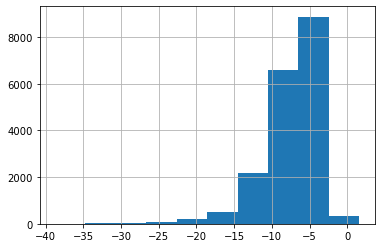

In [39]:
import matplotlib.pyplot as plt
df["loudness"].hist()

Obviously, it does not look close to the Normal distribution. Now, using the `simulate_average` function we defined before on the column `loudness`:

1. Simulate $r=100$ (number of relications) sample means of size $n=1000$ (number in `simulate_average`).  Store the results in `df_loud_100` and plot a historgram.
2. Simulate $r=1000$ sample means of size $n=1000$.  Store the results in `df_loud_1000` and plot a historgram.
3. Simulate $r=10000$ sample means of size $n=1000$.  Store the results in `df_loud_10000` and plot a historgram.

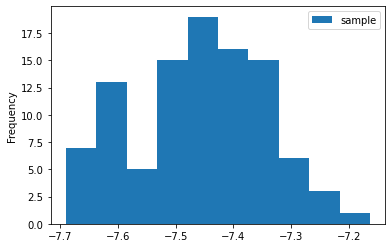

In [43]:
# do the first simulation here
data = []
for i in range(100):
    sample = simulate_average("loudness",1000)
    d = {"sample":sample}
    data.append(d)
df_loudness_100 = pd.DataFrame(data)
# do the plot here
df_loudness_100.plot.hist()

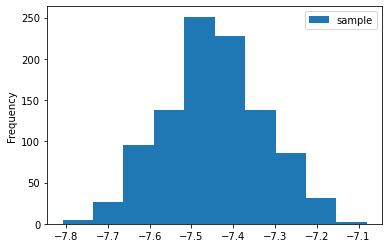

In [46]:
# do the second simulation here
data = []
for i in range(1000):
    sample = simulate_average("loudness",1000)
    d = {"sample":sample}
    data.append(d)
df_loudness_1000 = pd.DataFrame(data)
# do the plot here
df_loudness_1000.plot.hist()

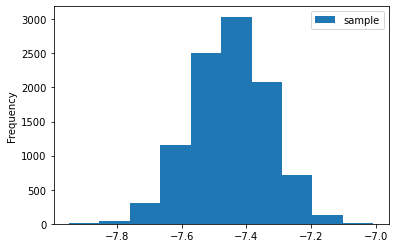

In [48]:
# do the third simulation here
data = []
for i in range(10000):
    sample = simulate_average("loudness",1000)
    d = {"sample":sample}
    data.append(d)
df_loudness_10000 = pd.DataFrame(data)
# do the plot here
df_loudness_10000.plot.hist()

In [49]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert( (-7.6 <= df_loudness_100.mean()).bool() & (df_loudness_100.mean() <= -7.3).bool() ), "The simulation is not correct!"
assert( (-7.6 <= df_loudness_1000.mean()).bool() & (df_loudness_1000.mean() <= -7.3).bool() ), "The simulation is not correct!"
assert( (-7.6 <= df_loudness_10000.mean()).bool() & (df_loudness_10000.mean() <= -7.3).bool() ), "The simulation is not correct!"
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.3: ❓ Individual Reflection ❓
What change do you notice in the histograms of `loudness` as we increase the number of replications $r$?

***Double click this cell and type your answer here.*** The histogram become more normally distributed.

# Puzzle 3: Claim Counts
Poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution) is a commonly used discrete probability distribution due to its simple form that only requires one parameter, which is often estimated by the mean. Suppose that an average number of claims that a ABC insurance company gets is 0.4 per day. Run the cell below to see the distribution of the number of claims per day.

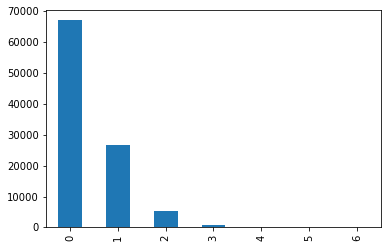

In [50]:
import numpy as np
# 100000 random numbers drawn from Poisson distribution with mean 0.4
x = pd.Series(np.random.poisson(0.4, 100000))
x.value_counts().plot.bar()

## Puzzle 3.1: Data Wrangling

Next, we will look at the number of claims per month, per quarter, and per year. The code given below gives you `df_day`, the number of claims that ABC insurance company received daily over their history of 276 years in business. From this dataframe, create `df_week`, `df_month`, and `df_quarter` for the number of claims that ABC insurance company received per week, month, and quarter, respectively.

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">Use group_by.</span>

In [61]:
np.random.seed(107)
nsim = 100800
df_day = pd.DataFrame({'claims':np.random.poisson(0.4,nsim)})
df_day['week'] = sorted(list(range(0,int(nsim/7) ))*7)
df_day['month'] = sorted(list(range(0,int(nsim/30) ))*30)
df_day['quarter'] = sorted(list(range(0,int(nsim/90) ))*90)

# Only need to modify the code below
df_week = df_day.groupby("week").sum()
df_month = df_day.groupby("month").sum()
df_quarter = df_day.groupby("quarter").sum()


In [62]:
## == TEST CASES for Puzzle 3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( isclose(df_week.claims.mean(), 2.800416666666)), "Check df_week!"
assert( isclose(df_month.claims.mean(), 12.00178571428)), "Check df_month!"
assert( isclose(df_quarter.claims.mean(), 36.00535714285714)), "Check df_quarter!"
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Histograms For The Dataframes
Plot the histogram of `claims` for `df_week`, `df_month`, and `df_quarter` and compare the distributions.

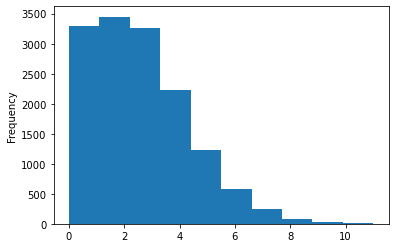

In [68]:
df_week["claims"].plot.hist()



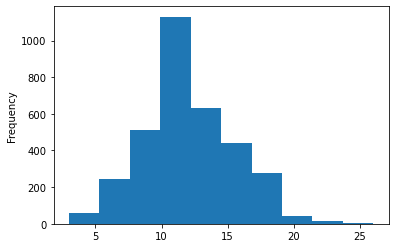

In [69]:
df_month["claims"].plot.hist()

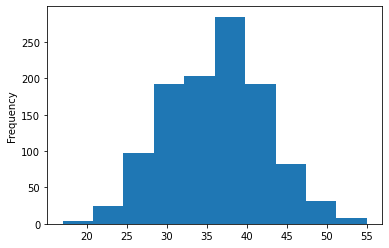

In [70]:
df_quarter["claims"].plot.hist()

## Puzzle 3.3: ❓ Individual Reflection ❓
What could be some applications of CLT in real world problems? 

***Double click this cell and type your answer here.***
Central limit theorom can be useful when sampling salary data or when conducting surveys. 

## Extra Credit: When CLT Fails

In some cases, we may not be able to apply the CLT. Try to replicate one of the cases here!

First, write a function called `cauchy_average` that will simulate `n` standard Cauchy random variables and return their average value.

Next, using the `cauchy_average` function:

1. Simulate $r=100$ sample means of size $n=1000$.  Store the results in `df_cauchy_100` and plot a historgram.
2. Simulate $r=1000$ sample means of size $n=1000$.  Store the results in `df_cauchy_1000` and plot a historgram.
3. Simulate $r=10000$ sample means of size $n=1000$.  Store the results in `df_cauchy_10000` and plot a historgram.

Unlike Puzzle 2.2, ***we also require the answer in this part to be reproducible***, i.e., the code should generate the same graph if you run them again.

In [ ]:
# r = 100

In [ ]:
# r = 1000

In [ ]:
# r = 10000

## ❓ Extra Credit Reflection ❓

What change(S) do you notice in the histograms as we increase the number of replications $r$? Try to explain.

***Double click this cell and type your answer here.***

## Submit Your Work!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!